# Pymaceuticals Inc.
---

### Analysis

- According to the graphs, Ramicane seems to have the best treatment due to the tumor size is smallest.
- The mouse weight have lineaer relationship with their average tumor volume. We can assume that if the weight is not too high, their tumor size will be decreased.
- Male mouse and female mouse seems not have any differences between tumor size. Which means the genders is not a key influence factor. Even it is, it should be a weak influence.

In [88]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data = pd.merge(study_results, mouse_metadata, on='Mouse ID')
# Display the data table for preview
merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [89]:
# Checking the number of mice.
number_of_mice = merged_data['Mouse ID'].nunique()
print(f'Number of mice: {number_of_mice}')

Number of mice: 249


In [90]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = merged_data[merged_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicate_mouse_ids = duplicate_mice["Mouse ID"].unique()
print(f'Duplicate mouse IDs: {duplicate_mouse_ids}')

Duplicate mouse IDs: ['g989']


In [91]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = pd.DataFrame()
for mouse_id in duplicate_mouse_ids:
    duplicate_mouse_data = duplicate_mouse_data.append(merged_data.loc[merged_data["Mouse ID"] == mouse_id])
duplicate_mouse_data    

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [92]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = merged_data.copy()
for mouse_id in duplicate_mouse_ids:
    clean_data = clean_data.drop(clean_data[clean_data["Mouse ID"] == mouse_id].index)
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [ ]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


In [93]:
# Checking the number of mice in the clean DataFrame
number_of_cleaned_mice = clean_data["Mouse ID"].nunique()
print(f"Number of mice in the clean DataFrame: {number_of_mice}")


Number of mice in the clean DataFrame: 249


In [94]:
# Checking the number of mice in the clean DataFrame.
number_of_mice = clean_data["Mouse ID"].value_counts().sum()
print(f"Number of mice in the clean DataFrame: {number_of_mice}")

Number of mice in the clean DataFrame: 1880


## Summary Statistics

In [95]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

# Groupby "Drug Regimen" and calculate the mean, median, variance, standard deviation, and SEM of "Tumor Volume (mm3)"
regimen_stats = clean_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
regimen_stats = regimen_stats.rename(columns={"mean": "Mean Tumor Volume",
                                              "median": "Median Tumor Volume",
                                              "var": "Tumor Volume Variance",
                                              "std": "Tumor Volume Std. Dev.",
                                              "sem": "Tumor Volume Std. Err."})

regimen_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [96]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.
regimen_stats = clean_data.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
regimen_stats = regimen_stats.rename(columns={"mean":"Mean Tumor Volume",
                                              "median":"Median Tumor Volume",
                                              "var":"Tumor Volume Variance",
                                              "std":"Tumor Volume Std. Dev.",
                                              "sem":"Tumor Volume Std. Err."})

regimen_stats 

Tumor Volume (mm3)                                            \
              Mean Tumor Volume Median Tumor Volume Tumor Volume Variance   
Drug Regimen                                                                
Capomulin             40.675741           41.557809             24.947764   
Ceftamin              52.591172           51.776157             39.290177   
Infubinol             52.884795           51.820584             43.128684   
Ketapril              55.235638           53.698743             68.553577   
Naftisol              54.331565           52.509285             66.173479   
Placebo               54.033581           52.288934             61.168083   
Propriva              52.320930           50.446266             43.852013   
Ramicane              40.216745           40.673236             23.486704   
Stelasyn              54.233149           52.431737             59.450562   
Zoniferol             53.236507           51.818479             48.533355   

                                                            
             Tumor Volume Std. Dev. Tumor Volume Std. Err.  
Drug Regimen                                                
Capomulin                  4.994774               0.329346  
Ceftamin                   6.268188               0.469821  
Infubinol                  6.567243               0.492236  
Ketapril                   8.279709               0.603860  
Naftisol                   8.134708               0.596466  
Placebo                    7.821003               0.581331  
Propriva                   6.622085               0.544332  
Ramicane                   4.846308               0.320955  
Stelasyn                   7.710419               0.573111  
Zoniferol                  6.966589               0.516398

## Bar and Pie Charts

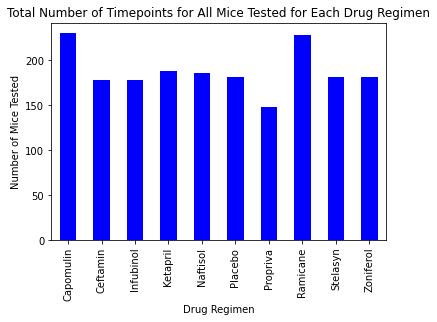

In [97]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
bar_data = clean_data.groupby(["Drug Regimen"]).size()
bar_data.plot(kind="bar", color="blue")
plt.title("Total Number of Timepoints for All Mice Tested for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()



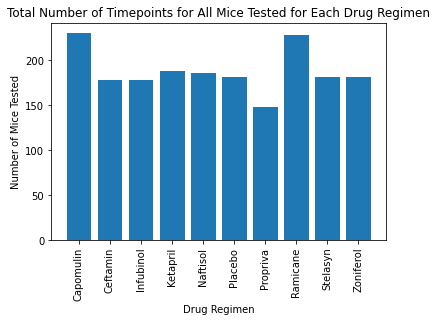

In [98]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
bar_data = clean_data.groupby(["Drug Regimen"]).size()
plt.bar(bar_data.index, bar_data.values)
plt.title("Total Number of Timepoints for All Mice Tested for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation = 90)
plt.show()



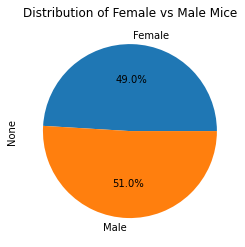

In [99]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_data = clean_data.groupby(["Sex"]).size()
gender_data.plot(kind="pie",autopct="%1.1f%%")
plt.title("Distribution of Female vs Male Mice")
plt.show()



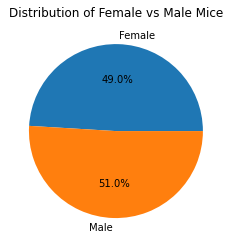

In [100]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_data = clean_data.groupby(["Sex"]).size()
plt.pie(gender_data.values, labels=gender_data.index, autopct="%1.1f%%")
plt.title("Distribution of Female vs Male Mice")
plt.show()



## Quartiles, Outliers and Boxplots

In [101]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoint = clean_data.groupby(["Mouse ID"]).max()["Timepoint"]
last_timepoint = last_timepoint.reset_index()

merged_data = pd.merge(last_timepoint, clean_data, on=["Mouse ID","Timepoint"], how="left")

final_tumor_volume = merged_data.loc[merged_data["Drug Regimen"].isin(["Capomulin","Ramicane","Infubinol","Ceftamin"])]
final_tumor_volume = final_tumor_volume[["Mouse ID","Drug Regimen","Tumor Volume (mm3)"]]
final_tumor_volume

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,a203,Infubinol,67.973419
1,a251,Infubinol,65.525743
3,a275,Ceftamin,62.999356
6,a411,Ramicane,38.407618
7,a444,Ramicane,43.047543
...,...,...,...
238,y769,Ceftamin,68.594745
239,y793,Capomulin,31.896238
240,y865,Ceftamin,64.729837
244,z578,Ramicane,30.638696


In [102]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes

for treatment in treatments:
    tumor_vol = final_tumor_volume.loc[final_tumor_volume["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]   
    

    tumor_vol_data.append(tumor_vol)
    quartiles = tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    print(f"{treatment}'s potential outliers are: {outliers}")
    

    

Capomulin's potential outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers are: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)


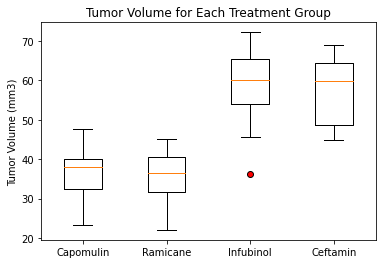

In [103]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig1, ax1 = plt.subplots()
ax1.set_title("Tumor Volume for Each Treatment Group")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.boxplot(tumor_vol_data, flierprops={"markerfacecolor": "red"}, labels=treatments)
plt.show()


## Line and Scatter Plots

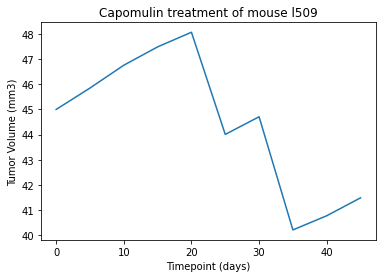

In [104]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_data = clean_data.loc[(clean_data["Drug Regimen"] == "Capomulin") & (clean_data["Mouse ID"] == "l509")]

plt.plot(capomulin_data["Timepoint"], capomulin_data["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")
plt.show()



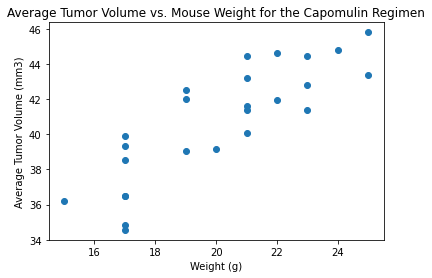

In [105]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_data = clean_data.loc[(clean_data['Drug Regimen'] == 'Capomulin')]
average_tumor_vol = capomulin_data.groupby(['Mouse ID']).mean()[['Weight (g)','Tumor Volume (mm3)']]

plt.scatter(average_tumor_vol['Weight (g)'],average_tumor_vol['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume vs. Mouse Weight for the Capomulin Regimen')
plt.show()


## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


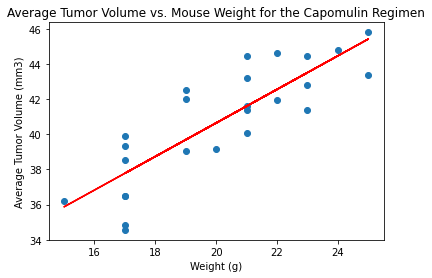

In [114]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(average_tumor_vol["Weight (g)"],average_tumor_vol["Tumor Volume (mm3)"])
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}")

slope, intercept, rvalue, pvalue, stderr = st.linregress(average_tumor_vol["Weight (g)"],average_tumor_vol["Tumor Volume (mm3)"])

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(average_tumor_vol["Weight (g)"],average_tumor_vol["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume vs. Mouse Weight for the Capomulin Regimen")
plt.plot(average_tumor_vol["Weight (g)"], intercept + slope*average_tumor_vol["Weight (g)"], "-", color="red")
plt.show()
